In [11]:
import sys
sys.path.append('..')
import config
from fqc import uccsd, qaoa, util
import numpy as np
from datetime import datetime
data_path = config.DATA_PATH
file_name = datetime.today().strftime('%h%d')

In [2]:
from quantum_optimal_control.helper_functions.grape_functions import transmon_gate
from quantum_optimal_control.main_grape.grape import Grape
from quantum_optimal_control.core import hamiltonian

In [3]:
d = 2 # this is the number of energy levels to consider (i.e. d-level qudits)
max_iterations = 8000
decay = max_iterations / 2
convergence = {'rate':0.01, 'max_iterations': max_iterations,
               'conv_target':1e-3, 'learning_rate_decay':decay, 'min_grad': 1e-12, 'update_step': 20}
reg_coeffs = {}

In [4]:
def binary_search_for_shortest_pulse_time(min_time, max_time):
    """Search between [min_time, max_time] up to 1ns tolerance. Assumes 20 steps per ns."""
    min_steps, max_steps = min_time * 20, max_time * 20
    while min_steps + 20 < max_steps:  # just estimate to +- 1ns
        mid_steps = int((min_steps + max_steps) / 2)
        total_time = mid_steps / 20.0
        print('\n\ntrying total_time: %s for unitary of size %s' % (str(total_time), str(U.shape)))
        SS = Grape(H0, Hops, Hnames, U, total_time, mid_steps, states_concerned_list, convergence,
                         reg_coeffs=reg_coeffs,
                         use_gpu=False, sparse_H=False, method='Adam', maxA=maxA,
                         show_plots=False, file_name=file_name, data_path=data_path)
        if SS.l < SS.conv.conv_target:  # if converged, search lower half
            max_steps = mid_steps
        else:
            min_steps = mid_steps

    return mid_steps / 20

In [5]:
N = 6
p = 1
circuit = qaoa.get_qaoa_circuit(N, p, '3Reg')
U = util.circuitutil.get_unitary(circuit)
connected_qubit_pairs = util.get_nearest_neighbor_coupling_list(2, 3, directed=False)
#connected_qubit_pairs = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (1, 5),
#                         (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]
H0 = hamiltonian.get_H0(N, d)
Hops, Hnames = hamiltonian.get_Hops_and_Hnames(N, d, connected_qubit_pairs)
states_concerned_list = hamiltonian.get_full_states_concerned_list(N, d)
maxA = hamiltonian.get_maxA(N, d, connected_qubit_pairs)

Process Process-15:
Process Process-1:
Process Process-28:
Process Process-27:
Process Process-26:
Process Process-24:
Process Process-25:
Process Process-23:
Process Process-22:
Process Process-4:
Process Process-21:
Process Process-7:
Process Process-5:
Process Process-2:
Process Process-10:
Process Process-20:
Process Process-6:
Process Process-8:
Process Process-19:
Process Process-9:
Process Process-3:
Process Process-18:
Process Process-12:
Process Process-17:
Process Process-11:
Process Process-16:
Process Process-14:
Process Process-13:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/pranavgokhale/.conda/envs/QOC_qiskit/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/pranavgokhale/.conda/envs/QOC_qiskit/lib/python3.6/multip

  File "/home/pranavgokhale/.conda/envs/QOC_qiskit/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/pranavgokhale/.conda/envs/QOC_qiskit/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/pranavgokhale/.conda/envs/QOC_qiskit/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/home/pranavgokhale/.conda/envs/QOC_qiskit/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/pranavgokhale/.conda/envs/QOC_qiskit/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/pranavgokhale/.conda/envs/QOC_qiskit/lib/python3.6/concurrent/futures/process.py", line 169, in _process_worker
    call_item = call_queue.get(block=True)
  File "/home/pranavgokhale/.conda/envs

  File "/home/pranavgokhale/.conda/envs/QOC_qiskit/lib/python3.6/multiprocessing/queues.py", line 93, in get
    with self._rlock:
  File "/home/pranavgokhale/.conda/envs/QOC_qiskit/lib/python3.6/multiprocessing/queues.py", line 93, in get
    with self._rlock:
  File "/home/pranavgokhale/.conda/envs/QOC_qiskit/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/pranavgokhale/.conda/envs/QOC_qiskit/lib/python3.6/multiprocessing/queues.py", line 93, in get
    with self._rlock:
  File "/home/pranavgokhale/.conda/envs/QOC_qiskit/lib/python3.6/multiprocessing/queues.py", line 93, in get
    with self._rlock:
  File "/home/pranavgokhale/.conda/envs/QOC_qiskit/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/pranavgokhale/.conda/envs/QOC_qiskit/lib/python3.6/multiprocessing/queues.py", line 93, in get
    with self._rlock:
  File "/home/pranavgokhale/.con

In [6]:
print(circuit)

                                                                              »
q_0: |0>──────────────────────────────────────────────────────────────────────»
                            ┌───┐                                             »
q_1: |0>────────────────────┤ H ├──■───────────────────■──────────────────────»
                       ┌───┐└───┘┌─┴─┐┌─────────────┐┌─┴─┐                    »
q_2: |0>───────────────┤ H ├─────┤ X ├┤ Rz(-3.8772) ├┤ X ├──■─────────────────»
                  ┌───┐└───┘     └───┘└─────────────┘└───┘┌─┴─┐┌─────────────┐»
q_3: |0>──────────┤ H ├───────────────────────────────────┤ X ├┤ Rz(-3.8772) ├»
             ┌───┐└───┘                                   └───┘└─────────────┘»
q_4: |0>─────┤ H ├────────────────────────────────────────────────────────────»
        ┌───┐└───┘                                                            »
q_5: |0>┤ H ├─────────────────────────────────────────────────────────────────»
        └───┘                           

In [7]:
util.circuitutil.get_max_pulse_time(circuit)

59.89999999999998

In [ ]:
# this was with Adam
shortest_time = binary_search_for_shortest_pulse_time(0, 60)



trying total_time: 30.0 for unitary of size (64, 64)
data saved at: /project/ftchong/qoc/pranav/00034_Mar12.h5
Using 7 Taylor terms and 3 Scaling & Squaring terms
Building graph:
Propagators initialized.
Operators weight initialized.
Intermediate propagation variables initialized.
Intermediate propagators initialized.
Vectors initialized.
Training loss initialized.
Optimizer initialized.
Utilities initialized.
Graph built!
Initialized
Error = :9.99e-01; Runtime: 2.4s; Iterations = 0, grads =   8.492e-04, unitary_metric = 1.00017
Error = :1.00e+00; Runtime: 31.9s; Iterations = 20, grads =   3.991e-09, unitary_metric = 0.99990
Error = :1.00e+00; Runtime: 57.9s; Iterations = 40, grads =   7.219e-07, unitary_metric = 0.99993
Error = :1.00e+00; Runtime: 83.8s; Iterations = 60, grads =   4.827e-06, unitary_metric = 0.99993
Error = :9.90e-01; Runtime: 110.9s; Iterations = 80, grads =   3.452e-03, unitary_metric = 0.99990
Error = :9.99e-01; Runtime: 138.4s; Iterations = 100, grads =   1.171e

In [9]:
# this was with L-BFGS-B
shortest_time = binary_search_for_shortest_pulse_time(108.9, 110)



trying total_time: 109.45 for unitary of size (64, 64)
data saved at: /project/ftchong/qoc/pranav/00038_Mar12.h5
Using 7 Taylor terms and 3 Scaling & Squaring terms
Building graph:
Propagators initialized.
Operators weight initialized.
Intermediate propagation variables initialized.
Intermediate propagators initialized.
Vectors initialized.
Training loss initialized.
Optimizer initialized.
Utilities initialized.
Graph built!
Initialized
Starting L-BFGS-B Optimization
Error = :9.98e-01; Runtime: 6.2s; Iterations = 0, grads =   1.869e-04, unitary_metric = 1.00062
Error = :9.98e-01; Runtime: 73.4s; Iterations = 20, grads =   1.725e-03, unitary_metric = 1.00062
Error = :8.43e-01; Runtime: 135.1s; Iterations = 40, grads =   1.839e-02, unitary_metric = 1.00062
Error = :6.66e-01; Runtime: 194.6s; Iterations = 60, grads =   2.674e-01, unitary_metric = 1.00058
Error = :6.42e-01; Runtime: 253.6s; Iterations = 80, grads =   2.069e-02, unitary_metric = 1.00056
Error = :6.38e-01; Runtime: 312.2s;

In [10]:
# this was with Adam
shortest_time = binary_search_for_shortest_pulse_time(2.0, 80)

AttributeError: 'NoneType' object has no attribute 'l'

Error: 9.329319e-04


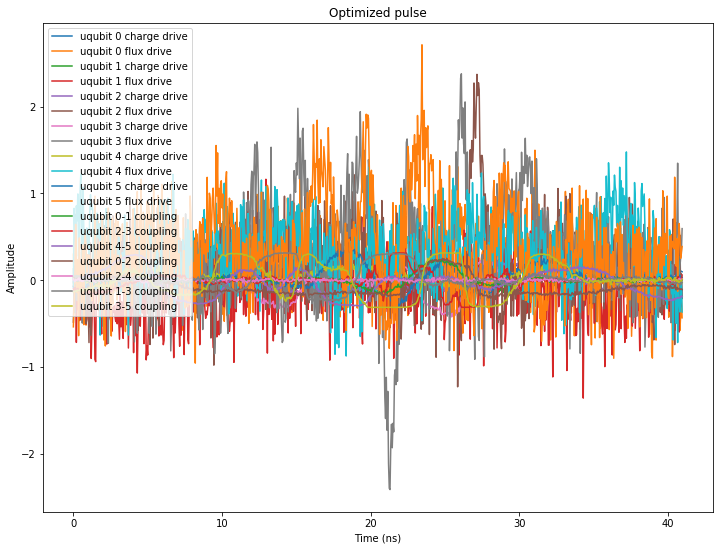

In [12]:
util.plot_pulse_from_file('/project/ftchong/qoc/pranav/00002_Mar13.h5', save_plot=False)

In [13]:
total_time = 41.0
mid_steps = 41 * 20
SS = Grape(H0, Hops, Hnames, U, total_time, mid_steps, states_concerned_list, convergence,
                 reg_coeffs=reg_coeffs,
                 use_gpu=False, sparse_H=False, method='Adam', maxA=maxA,
                 show_plots=False, file_name=file_name, data_path=data_path)

data saved at: /project/ftchong/qoc/pranav/00008_Mar13.h5
Using 7 Taylor terms and 3 Scaling & Squaring terms
Building graph:
Propagators initialized.
Operators weight initialized.
Intermediate propagation variables initialized.
Intermediate propagators initialized.
Vectors initialized.
Training loss initialized.
Optimizer initialized.
Utilities initialized.
Graph built!
Initialized
Error = :9.99e-01; Runtime: 1.6s; Iterations = 0, grads =   2.403e-04, unitary_metric = 1.00033
Error = :6.26e-01; Runtime: 31.5s; Iterations = 20, grads =   1.697e+00, unitary_metric = 1.00021
Error = :5.57e-01; Runtime: 57.9s; Iterations = 40, grads =   1.569e-01, unitary_metric = 1.00021
Error = :5.53e-01; Runtime: 84.3s; Iterations = 60, grads =   3.811e-02, unitary_metric = 1.00020
Error = :5.53e-01; Runtime: 110.5s; Iterations = 80, grads =   6.031e-02, unitary_metric = 1.00021
Error = :5.51e-01; Runtime: 136.9s; Iterations = 100, grads =   2.678e-03, unitary_metric = 1.00021
Error = :5.52e-01; Runtim

Error = :5.46e-01; Runtime: 2092.7s; Iterations = 1560, grads =   7.834e-03, unitary_metric = 1.00015
Error = :5.46e-01; Runtime: 2118.9s; Iterations = 1580, grads =   9.495e-03, unitary_metric = 1.00015
Error = :5.46e-01; Runtime: 2145.1s; Iterations = 1600, grads =   2.159e-02, unitary_metric = 1.00014
Error = :5.46e-01; Runtime: 2173.8s; Iterations = 1620, grads =   8.451e-03, unitary_metric = 1.00015
Error = :5.46e-01; Runtime: 2200.0s; Iterations = 1640, grads =   1.876e-02, unitary_metric = 1.00015
Error = :5.45e-01; Runtime: 2226.3s; Iterations = 1660, grads =   2.828e-03, unitary_metric = 1.00015
Error = :5.45e-01; Runtime: 2252.6s; Iterations = 1680, grads =   3.859e-04, unitary_metric = 1.00015
Error = :5.47e-01; Runtime: 2279.1s; Iterations = 1700, grads =   2.592e-02, unitary_metric = 1.00015
Error = :5.47e-01; Runtime: 2307.4s; Iterations = 1720, grads =   2.452e-02, unitary_metric = 1.00014
Error = :5.46e-01; Runtime: 2333.7s; Iterations = 1740, grads =   1.194e-02, unita

Error = :3.40e-01; Runtime: 4258.3s; Iterations = 3180, grads =   3.227e-04, unitary_metric = 1.00010
Error = :3.41e-01; Runtime: 4284.7s; Iterations = 3200, grads =   3.078e-02, unitary_metric = 1.00011
Error = :3.41e-01; Runtime: 4312.7s; Iterations = 3220, grads =   2.242e-02, unitary_metric = 1.00011
Error = :3.40e-01; Runtime: 4339.1s; Iterations = 3240, grads =   2.059e-03, unitary_metric = 1.00011
Error = :3.40e-01; Runtime: 4365.3s; Iterations = 3260, grads =   1.745e-04, unitary_metric = 1.00010
Error = :3.40e-01; Runtime: 4391.7s; Iterations = 3280, grads =   1.709e-04, unitary_metric = 1.00010
Error = :3.40e-01; Runtime: 4418.0s; Iterations = 3300, grads =   7.677e-03, unitary_metric = 1.00011
Error = :3.40e-01; Runtime: 4446.3s; Iterations = 3320, grads =   3.830e-03, unitary_metric = 1.00011
Error = :3.40e-01; Runtime: 4472.5s; Iterations = 3340, grads =   3.614e-04, unitary_metric = 1.00010
Error = :3.40e-01; Runtime: 4498.9s; Iterations = 3360, grads =   2.653e-05, unita

Error = :3.41e-01; Runtime: 6419.1s; Iterations = 4800, grads =   1.988e-02, unitary_metric = 1.00011
Error = :3.40e-01; Runtime: 6447.2s; Iterations = 4820, grads =   4.757e-03, unitary_metric = 1.00010
Error = :3.40e-01; Runtime: 6473.5s; Iterations = 4840, grads =   1.432e-03, unitary_metric = 1.00010
Error = :3.40e-01; Runtime: 6500.2s; Iterations = 4860, grads =   4.099e-04, unitary_metric = 1.00010
Error = :3.40e-01; Runtime: 6526.4s; Iterations = 4880, grads =   4.225e-03, unitary_metric = 1.00010
Error = :3.40e-01; Runtime: 6552.8s; Iterations = 4900, grads =   2.202e-03, unitary_metric = 1.00010
Error = :3.40e-01; Runtime: 6581.1s; Iterations = 4920, grads =   1.080e-04, unitary_metric = 1.00010
Error = :3.40e-01; Runtime: 6607.5s; Iterations = 4940, grads =   2.236e-04, unitary_metric = 1.00010
Error = :3.40e-01; Runtime: 6633.9s; Iterations = 4960, grads =   5.995e-03, unitary_metric = 1.00010
Error = :3.40e-01; Runtime: 6660.2s; Iterations = 4980, grads =   1.037e-02, unita

Error = :3.40e-01; Runtime: 8580.8s; Iterations = 6420, grads =   1.479e-03, unitary_metric = 1.00011
Error = :3.40e-01; Runtime: 8607.1s; Iterations = 6440, grads =   8.502e-04, unitary_metric = 1.00011
Error = :3.40e-01; Runtime: 8633.4s; Iterations = 6460, grads =   9.787e-04, unitary_metric = 1.00011
Error = :3.40e-01; Runtime: 8659.7s; Iterations = 6480, grads =   1.162e-04, unitary_metric = 1.00011
Error = :3.40e-01; Runtime: 8685.9s; Iterations = 6500, grads =   1.618e-03, unitary_metric = 1.00011
Error = :3.40e-01; Runtime: 8713.9s; Iterations = 6520, grads =   3.431e-03, unitary_metric = 1.00010
Error = :3.40e-01; Runtime: 8740.2s; Iterations = 6540, grads =   3.494e-03, unitary_metric = 1.00011
Error = :3.40e-01; Runtime: 8766.3s; Iterations = 6560, grads =   8.022e-04, unitary_metric = 1.00011
Error = :3.40e-01; Runtime: 8792.5s; Iterations = 6580, grads =   2.309e-04, unitary_metric = 1.00010
Error = :3.40e-01; Runtime: 8818.7s; Iterations = 6600, grads =   6.543e-04, unita

In [ ]:
total_time = 41.0
mid_steps = 41 * 20
SS = Grape(H0, Hops, Hnames, U, total_time, mid_steps, states_concerned_list, convergence,
                 reg_coeffs=reg_coeffs,
                 use_gpu=False, sparse_H=False, method='Adam', maxA=maxA,
                 show_plots=False, file_name=file_name, data_path=data_path)

data saved at: /project/ftchong/qoc/pranav/00009_Mar13.h5
Using 7 Taylor terms and 3 Scaling & Squaring terms
Building graph:
Propagators initialized.
Operators weight initialized.
Intermediate propagation variables initialized.
Intermediate propagators initialized.
Vectors initialized.
Training loss initialized.
Optimizer initialized.
Utilities initialized.
Graph built!
Initialized
Error = :1.00e+00; Runtime: 1.6s; Iterations = 0, grads =   5.498e-05, unitary_metric = 1.00020
Error = :6.39e-01; Runtime: 30.8s; Iterations = 20, grads =   8.947e-01, unitary_metric = 1.00019
Error = :5.64e-01; Runtime: 57.2s; Iterations = 40, grads =   1.912e-01, unitary_metric = 1.00021
Error = :5.53e-01; Runtime: 83.6s; Iterations = 60, grads =   3.758e-02, unitary_metric = 1.00021
Error = :5.52e-01; Runtime: 109.8s; Iterations = 80, grads =   1.637e-02, unitary_metric = 1.00019
Error = :5.52e-01; Runtime: 136.1s; Iterations = 100, grads =   4.968e-02, unitary_metric = 1.00020
Error = :5.56e-01; Runtim

Error = :1.30e-01; Runtime: 2079.9s; Iterations = 1560, grads =   1.273e-07, unitary_metric = 1.00005
Error = :1.30e-01; Runtime: 2106.0s; Iterations = 1580, grads =   7.970e-04, unitary_metric = 1.00005
Error = :1.30e-01; Runtime: 2132.2s; Iterations = 1600, grads =   1.272e-03, unitary_metric = 1.00005
Error = :1.30e-01; Runtime: 2160.3s; Iterations = 1620, grads =   2.665e-04, unitary_metric = 1.00006
Error = :1.30e-01; Runtime: 2186.6s; Iterations = 1640, grads =   1.266e-04, unitary_metric = 1.00005
Error = :1.30e-01; Runtime: 2212.8s; Iterations = 1660, grads =   1.553e-05, unitary_metric = 1.00005
Error = :1.30e-01; Runtime: 2239.1s; Iterations = 1680, grads =   1.243e-07, unitary_metric = 1.00005
Error = :1.30e-01; Runtime: 2265.3s; Iterations = 1700, grads =   4.009e-07, unitary_metric = 1.00005
Error = :1.30e-01; Runtime: 2293.3s; Iterations = 1720, grads =   1.971e-08, unitary_metric = 1.00005
Error = :1.30e-01; Runtime: 2319.6s; Iterations = 1740, grads =   4.053e-08, unita

Error = :1.30e-01; Runtime: 4237.0s; Iterations = 3180, grads =   2.369e-03, unitary_metric = 1.00006
Error = :1.30e-01; Runtime: 4263.3s; Iterations = 3200, grads =   1.383e-03, unitary_metric = 1.00005
Error = :1.31e-01; Runtime: 4291.0s; Iterations = 3220, grads =   8.601e-03, unitary_metric = 1.00005
Error = :1.31e-01; Runtime: 4317.2s; Iterations = 3240, grads =   8.221e-03, unitary_metric = 1.00006
Error = :1.30e-01; Runtime: 4343.4s; Iterations = 3260, grads =   1.944e-03, unitary_metric = 1.00006
Error = :1.30e-01; Runtime: 4369.7s; Iterations = 3280, grads =   2.559e-03, unitary_metric = 1.00006
Error = :1.30e-01; Runtime: 4396.0s; Iterations = 3300, grads =   2.858e-03, unitary_metric = 1.00006
Error = :1.31e-01; Runtime: 4423.9s; Iterations = 3320, grads =   6.271e-03, unitary_metric = 1.00006
Error = :1.31e-01; Runtime: 4450.5s; Iterations = 3340, grads =   7.376e-03, unitary_metric = 1.00006
Error = :1.30e-01; Runtime: 4476.7s; Iterations = 3360, grads =   1.435e-03, unita

Error = :1.30e-01; Runtime: 6392.6s; Iterations = 4800, grads =   6.157e-04, unitary_metric = 1.00005
Error = :1.30e-01; Runtime: 6420.5s; Iterations = 4820, grads =   1.840e-03, unitary_metric = 1.00005
Error = :1.30e-01; Runtime: 6446.5s; Iterations = 4840, grads =   1.628e-03, unitary_metric = 1.00005
Error = :1.31e-01; Runtime: 6472.7s; Iterations = 4860, grads =   7.848e-03, unitary_metric = 1.00005
Error = :1.30e-01; Runtime: 6499.1s; Iterations = 4880, grads =   1.313e-03, unitary_metric = 1.00005
Error = :1.30e-01; Runtime: 6525.4s; Iterations = 4900, grads =   4.949e-04, unitary_metric = 1.00005
Error = :1.31e-01; Runtime: 6553.7s; Iterations = 4920, grads =   6.235e-03, unitary_metric = 1.00005
Error = :1.30e-01; Runtime: 6579.8s; Iterations = 4940, grads =   1.413e-03, unitary_metric = 1.00005
Error = :1.30e-01; Runtime: 6606.0s; Iterations = 4960, grads =   1.805e-03, unitary_metric = 1.00005
Error = :1.30e-01; Runtime: 6632.3s; Iterations = 4980, grads =   2.798e-03, unita

Error = :1.30e-01; Runtime: 8549.7s; Iterations = 6420, grads =   1.777e-04, unitary_metric = 1.00006
Error = :1.30e-01; Runtime: 8576.0s; Iterations = 6440, grads =   9.269e-04, unitary_metric = 1.00006
Error = :1.31e-01; Runtime: 8602.4s; Iterations = 6460, grads =   3.366e-03, unitary_metric = 1.00006
Error = :1.30e-01; Runtime: 8628.6s; Iterations = 6480, grads =   5.856e-04, unitary_metric = 1.00006
Error = :1.30e-01; Runtime: 8654.9s; Iterations = 6500, grads =   8.692e-05, unitary_metric = 1.00006
Error = :1.30e-01; Runtime: 8683.2s; Iterations = 6520, grads =   6.020e-05, unitary_metric = 1.00005
Error = :1.30e-01; Runtime: 8709.4s; Iterations = 6540, grads =   2.438e-03, unitary_metric = 1.00006
Error = :1.30e-01; Runtime: 8735.6s; Iterations = 6560, grads =   2.654e-03, unitary_metric = 1.00006
Error = :1.30e-01; Runtime: 8762.0s; Iterations = 6580, grads =   2.655e-04, unitary_metric = 1.00006
Error = :1.30e-01; Runtime: 8788.3s; Iterations = 6600, grads =   4.438e-04, unita